## How to find a Kepler planet with **lightkurve**

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from lightkurve import KeplerTargetPixelFile, box_period_search

In [3]:
tpf = KeplerTargetPixelFile("https://archive.stsci.edu/missions/kepler/target_pixel_files/"
                            "0119/011904151/kplr011904151-2009350155506_lpd-targ.fits.gz")

(<matplotlib.figure.Figure at 0x1c1cc9ad30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c1d184e10>)

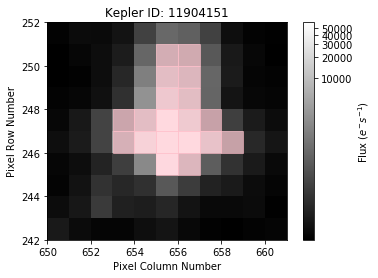

In [19]:
tpf.plot(aperture_mask=tpf.pipeline_mask, scale='log', cmap='gray')

In [5]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

Text(0.5,0,'Time - 2454833 (days)')

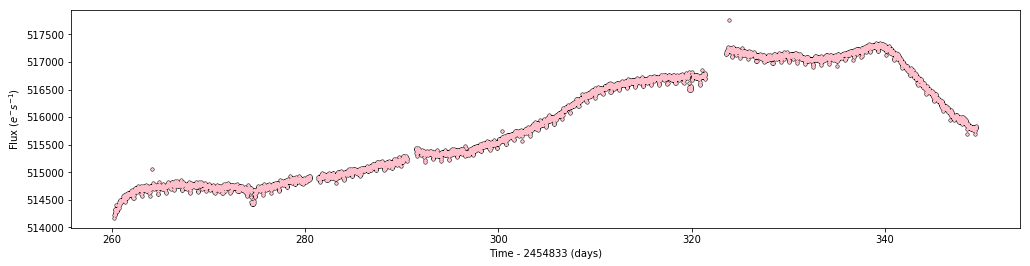

In [7]:
plt.figure(figsize=(17, 4))
plt.plot(lc.time, lc.flux, 'ko', markersize=3)
plt.plot(lc.time, lc.flux, 'o', color='pink', markersize=2)
plt.ylabel(r"Flux $(e^{-}s^{-1})$")
plt.xlabel(r"Time - 2454833 (days)")

In [8]:
flat, trend = lc.flatten(return_trend=True)

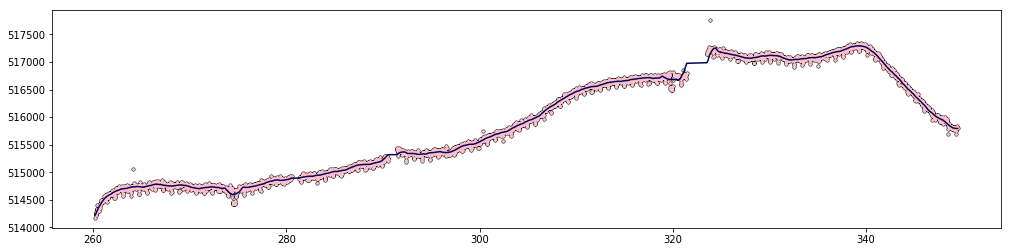

In [9]:
plt.figure(figsize=(17, 4))
plt.plot(lc.time, lc.flux, 'ko', markersize=3)
plt.plot(lc.time, lc.flux, 'o', color='pink', markersize=2)
plt.plot(trend.time, trend.flux, color='#00035b')

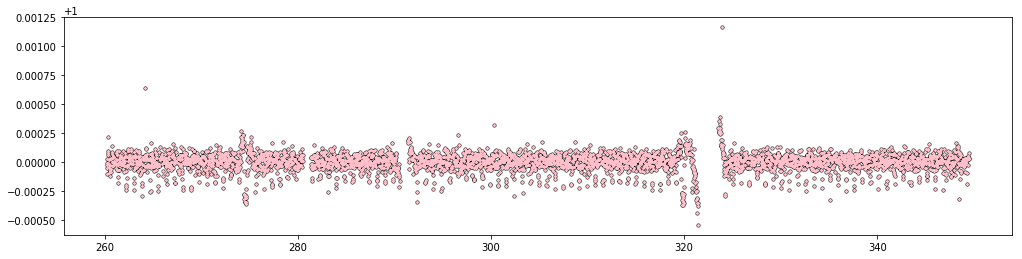

In [10]:
plt.figure(figsize=(17, 4))
plt.plot(flat.time, flat.flux, 'ko', markersize=3)
plt.plot(flat.time, flat.flux, 'o', color='pink', markersize=2)

In [11]:
prob, periods, best_period = box_period_search(flat, min_period=0.1, max_period=5,
                                               nperiods=500, period_scale='log')

  0%|          | 0/500 [00:00<?, ?it/s]/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
100%|██████████| 500/500 [01:44<00:00,  4.79it/s]


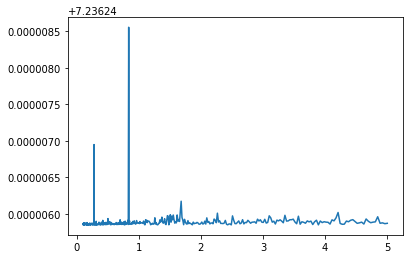

In [12]:
plt.plot(periods, prob)

In [13]:
best_period # correct period: 0.837495

0.83692610925322664

In [14]:
fold = flat.fold(period=best_period)

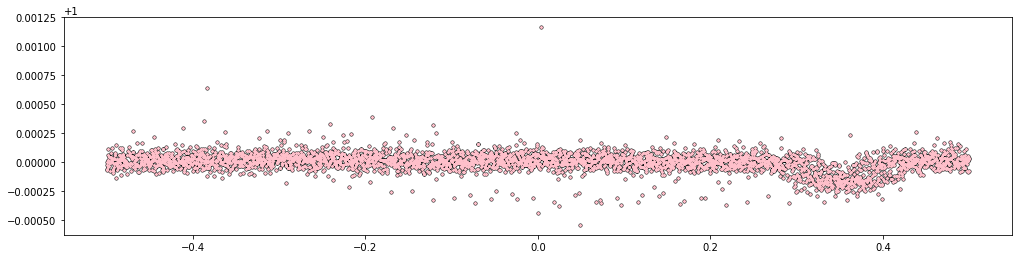

In [15]:
plt.figure(figsize=(17, 4))
plt.plot(fold.time, fold.flux, 'ko', markersize=3)
plt.plot(fold.time, fold.flux, 'o', color='pink', markersize=2)

In [16]:
binned = fold.bin(binsize=26)

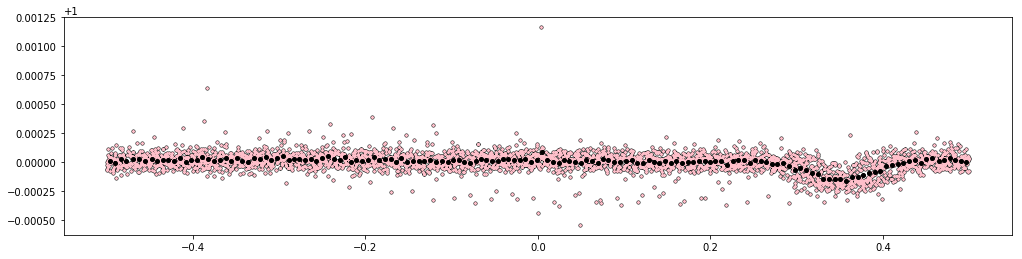

In [17]:
plt.figure(figsize=(17, 4))
plt.plot(fold.time, fold.flux, 'ko', markersize=3)
plt.plot(fold.time, fold.flux, 'o', color='pink', markersize=2)
plt.plot(binned.time, binned.flux, 'ko', markersize=4)